# PRODIGY-DS: TASK-1

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv(
    r"C:\Users\ravee\OneDrive\Documents\Projects\PRODIGY_DS_01\Data Set-Task1\API_SP.POP.TOTL_DS2_en_csv_v2_20333.csv",
    skiprows=4
)
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107624.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,769294618.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,984846.0,1011421.0,1036950.0,1062737.0,1090270.0,1120168.0,...,1777568.0,1791019.0,1797086.0,1788891.0,1790151.0,1786079.0,1768096.0,1682668.0,1527324.0,NaN
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5532301.0,5655232.0,5782221.0,5911135.0,6048006.0,6195593.0,...,32109010.0,33090921.0,34085182.0,35111408.0,36134863.0,37140230.0,38222876.0,39390799.0,40583164.0,NaN
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,16440172.0,16908035.0,17418522.0,17954564.0,18511361.0,19089380.0,...,57259551.0,57635162.0,58613001.0,59587885.0,60562381.0,61502603.0,62378410.0,63212384.0,64007187.0,NaN
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3153729.0,3254086.0,3358099.0,3465907.0,3577017.0,3692086.0,...,16914423.0,17441320.0,17973569.0,18513839.0,19059395.0,19603607.0,20152938.0,20723965.0,21314956.0,NaN


In [47]:
df.drop(['Indicator Name', 'Indicator Code'], errors='ignore');

Population Trend By Country

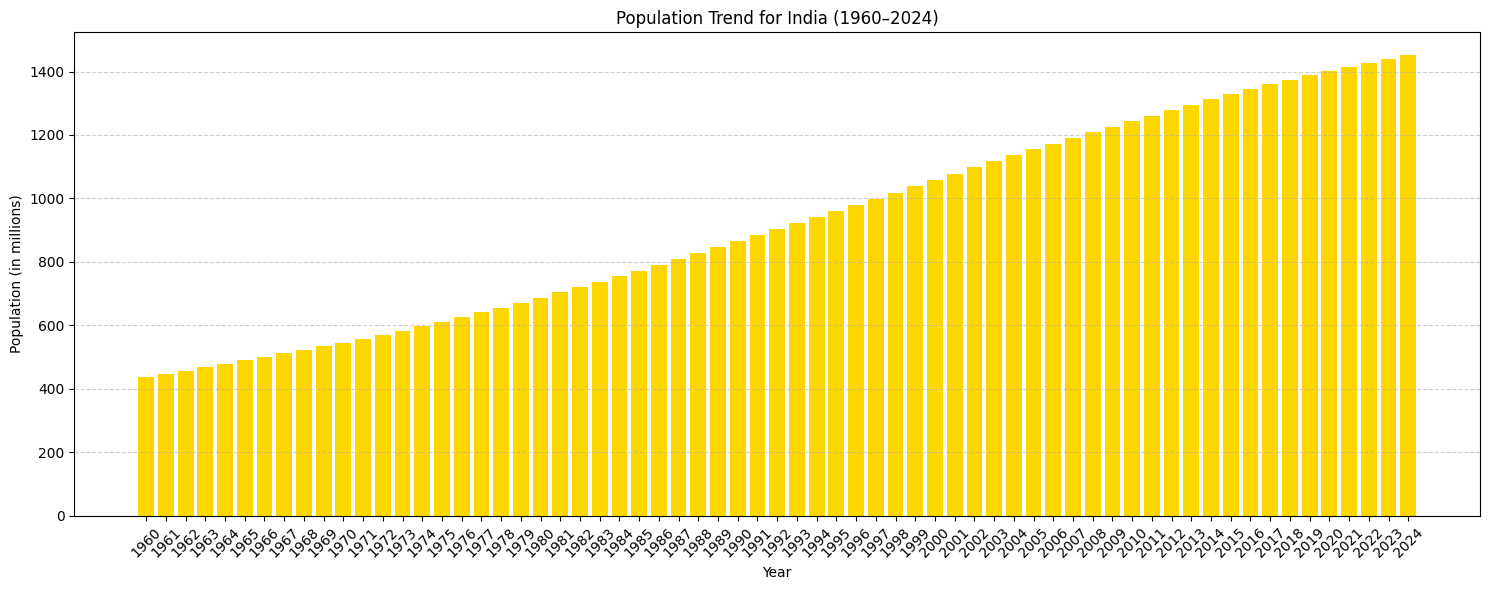

In [48]:
years = [col for col in df.columns if col.isdigit()]
country = input("Enter a country name:")
if(country not in df['Country Name'].values):
    print(f"Country '{country}' not found")
else:
    country_data = df[df['Country Name']==country].iloc[0]
    population_by_year = country_data[years].dropna().astype(float)

    # Plot bar chart
    plt.figure(figsize=(15,6))
    plt.bar(population_by_year.index, population_by_year.values / 1e6, color='gold')
    plt.xticks(rotation=45)
    plt.title(f"Population Trend for {country} (1960–{population_by_year.index[-1]})")
    plt.xlabel("Year")
    plt.ylabel("Population (in millions)")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


Population growth rates across countries

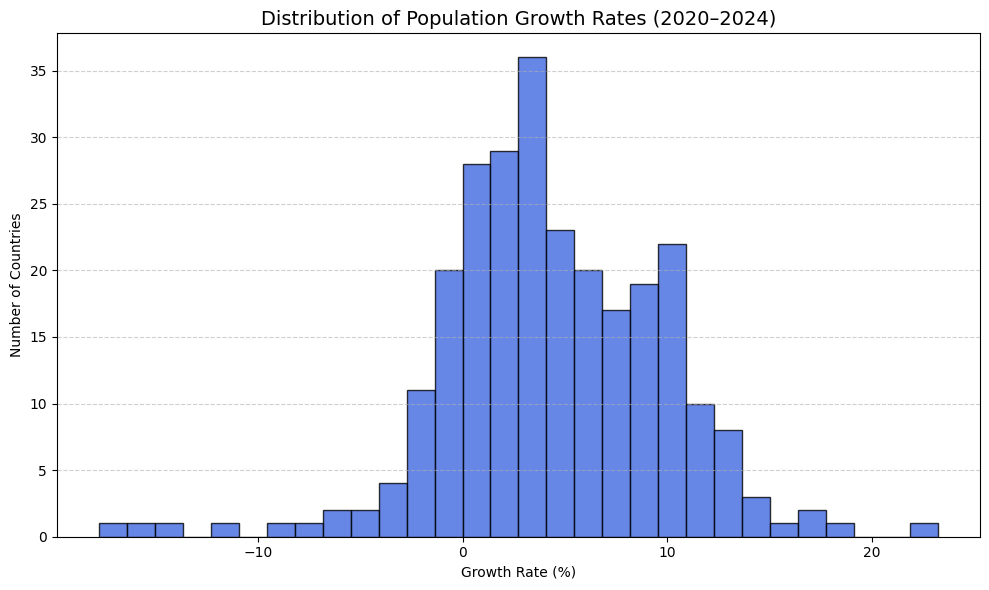

In [49]:
start_year = input("Enter starting year:")
end_year = input("Enter ending year:")

df_growth = df[['Country Name', start_year, end_year]].dropna()

# Compute percentage growth
df_growth['Growth Rate (%)'] = (
    (df_growth[end_year].astype(float) - df_growth[start_year].astype(float)) 
    / df_growth[start_year].astype(float)
) * 100

# --- Plot histogram ---
plt.figure(figsize=(10, 6))
plt.hist(df_growth['Growth Rate (%)'], bins=30, color='royalblue', edgecolor='black', alpha=0.8)
plt.title(f"Distribution of Population Growth Rates ({start_year}–{end_year})", fontsize=14)
plt.xlabel("Growth Rate (%)")
plt.ylabel("Number of Countries")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()